# PROYEK ANALISIS DATA

Nama : Muhammad Hafiz Nur
Email : muhammadhafiznur796@gmail.com
ID Dicoding : Muhammad Hafiz Nur

# MEMBUAT PERTANYAAN BISNIS

1. Bagaimana pengaruh cuaca dalam penggunaan Sepeda
2. Bagaimana tingkat penggunaan sepeda pada holiday dan working day?
3. Bagaimana tren penggunaan sepeda per bulan di tiap tahunnya?
4. Bagaimana pola penggunaan sepeda setiap hari?

In [15]:
#Menyiapkan library yang digunakan

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [111]:
#Load Tabel Day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#Load Tabel Hour

hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [9]:
#Menilai Type Data Day

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [33]:
#Melihat data paling terakhir

day_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,Misty/Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,Misty/Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,Misty/Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,Clean/Partly Cloudy,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,Misty/Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [12]:
#Mengecek missing value dan Duplikasi DATASET DAY

print("Misssing value :", day_df.isna().sum())
print("Jumlah Duplikasi :", day_df.duplicated().sum())

Misssing value : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah Duplikasi : 0


CEK BOXPLOT


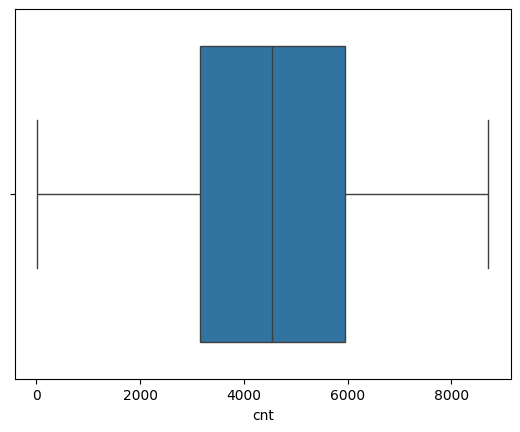

CEK BOXPLOT


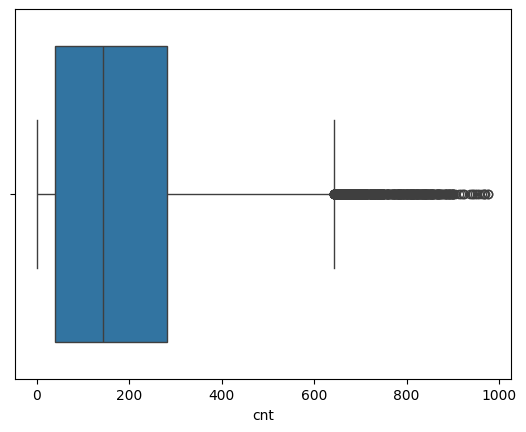

In [18]:
#Cek Outlier DATASET DAY dan HOUR

print("CEK BOXPLOT")
sns.boxplot(x=day_df['cnt'])
plt.show()

print("CEK BOXPLOT")
sns.boxplot(x=hour_df['cnt'])
plt.show()

## CLEANING DATA

In [19]:
#Menghilangkan Outlier

Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

median_cnt = hour_df['cnt'].median()
hour_df['cnt'] = np.where((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound), median_cnt, hour_df['cnt'])

CEK BOXPLOT


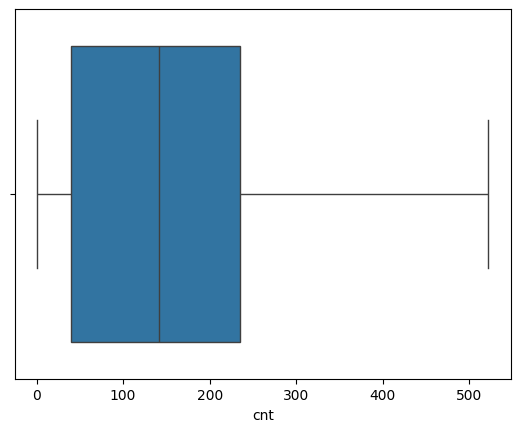

In [20]:
#Cek Outlier Lagi dari DATASET HOUR

print("CEK BOXPLOT")
sns.boxplot(x=hour_df['cnt'])
plt.show()


In [22]:
#Mengubah tipe data dteday dari object menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# EXPLORATORY DATA ANALYSIS

# Explore

In [25]:
#Mengelompokkan data berdasarkan bulan

day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
  

cnt                           
       max   min         mean     sum
mnth                                 
1     4521   431  2176.338710  134933
2     5062  1005  2655.298246  151352
3     8362   605  3692.258065  228920
4     7460   795  4484.900000  269094
5     8294  2633  5349.774194  331686
6     8120  3767  5772.366667  346342
7     8173  3285  5563.677419  344948
8     7865  1115  5664.419355  351194
9     8714  1842  5766.516667  345991
10    8156    22  5199.225806  322352
11    6852  1495  4247.183333  254831
12    6606   441  3403.806452  211036

In [26]:
#Mengelompokkan Data berdasarkan cuaca

# Pengelompokan penyewa sepeda berdasarkan kondisi cuaca
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

In [28]:
#Mengubah nomor menjadi kategori
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clean/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [30]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clean/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [31]:
#Mengelompokkan data Holiday

day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [110]:
#Mengelompokkan data Workingday

day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

In [105]:
#Melihat penggunaan sepeda pada tahun 2011

#Informasi Terkait pnyewaan pada tahun 2011
data_df_2011 = day_df[day_df["dteday"].dt.year == 2011]

data_df_2011["mnth"] = data_df_2011["dteday"].dt.month

bike_user_2011 = data_df_2011.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

bike_user_2011

C:\Users\Muhammad Hafiz Nur\AppData\Local\Temp\ipykernel_12364\3051394982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_2011["mnth"] = data_df_2011["dteday"].dt.month


instant     cnt                                      
     nunique     sum   max   min         mean          std
mnth                                                      
1         31   38189  1985   431  1231.903226   372.432665
2         28   48215  2927  1005  1721.964286   398.508839
3         31   64045  3239   605  2065.967742   550.971716
4         30   94870  5312   795  3162.333333  1042.093593
5         31  135821  5805  2633  4381.322581   572.927883
6         30  143512  5515  3767  4783.733333   444.447812
7         31  141341  6043  3285  4559.387097   680.090762
8         31  136691  5895  1115  4409.387097   809.852401
9         30  127418  5423  1842  4247.266667   965.377251
10        31  123511  5511   627  3984.225806  1103.481844
11        30  102167  4486  1495  3405.566667   788.249290
12        31   87323  3940   705  2816.870968   958.763187

In [106]:
#Informasi Terkait pnyewaan pada tahun 2012
data_df_2012 = day_df[day_df["dteday"].dt.year == 2012]

data_df_2012["mnth"] = data_df_2012["dteday"].dt.month

bike_user_2012 = data_df_2012.groupby(by="mnth").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

bike_user_2012

C:\Users\Muhammad Hafiz Nur\AppData\Local\Temp\ipykernel_12364\2136336700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_2012["mnth"] = data_df_2012["dteday"].dt.month


instant     cnt                                      
     nunique     sum   max   min         mean          std
mnth                                                      
1         31   96744  4521  1301  3120.774194   872.852134
2         29  103137  5062  1529  3556.448276   870.724640
3         31  164875  8362  3194  5318.548387  1251.162682
4         30  174224  7460  1027  5807.466667  1308.938916
5         31  195865  8294  2843  6318.225806  1078.403997
6         30  202830  8120  4127  6761.000000   954.204995
7         31  203607  8173  4459  6567.967742   867.183736
8         31  214503  7865  4549  6919.451613   794.059017
9         30  218573  8714  4073  7285.766667   979.160925
10        31  198841  8156    22  6414.225806  1941.819400
11        30  152664  6852  2277  5088.800000  1129.731198
12        31  123713  6606   441  3990.741935  1803.227864

In [47]:
#Melihat penggunaan sepeda setiap hari

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

# Visualization dan Data Explanatory

## Pertanyaan 1

C:\Users\Muhammad Hafiz Nur\AppData\Local\Temp\ipykernel_12364\2895148470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


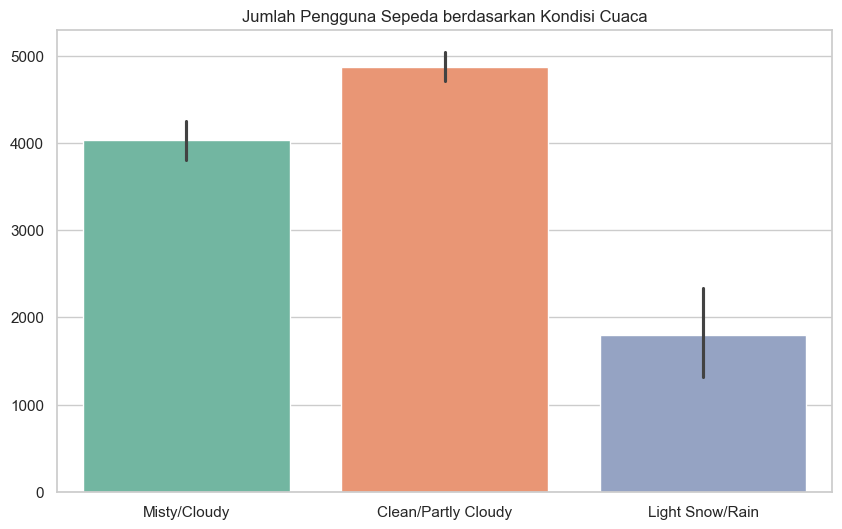

In [107]:
#1. Bagaimana Pengaruh Cuaca dalam Penggunaan Sepeda
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df,
    palette='Set2'
)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

## Pertanyaan 2

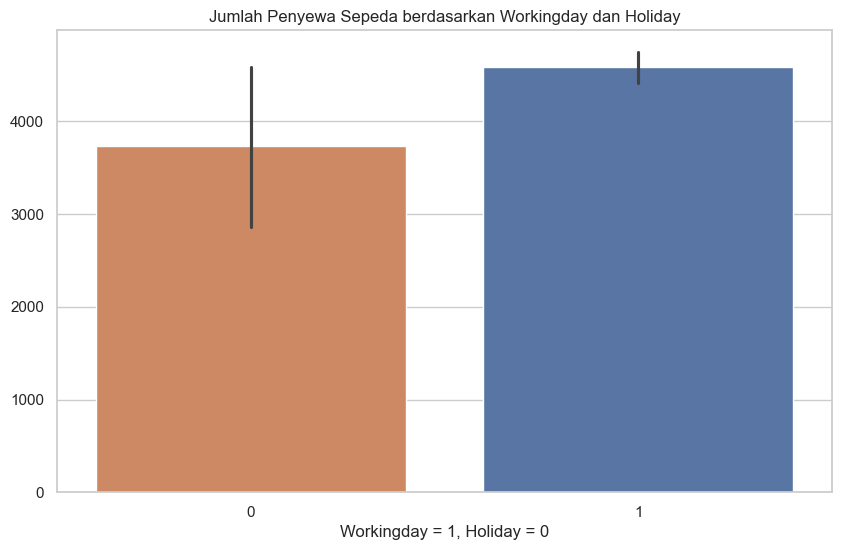

In [109]:
#2. Bagaimana tingkat penggunaan sepeda pada holiday dan working day?
# Filter data untuk hanya menampilkan workingday == 1 atau holiday == 1
filtered_df = day_df[(day_df['workingday'] == 1) | (day_df['holiday'] == 1)]

# Membuat plot
plt.figure(figsize=(10, 6))

# Menggunakan hue untuk membedakan antara workingday dan holiday
sns.barplot(
    data=filtered_df,
    x='workingday',
    y='cnt',
    hue='holiday',
    legend=False
)

plt.title('Jumlah Penyewa Sepeda berdasarkan Workingday dan Holiday')
plt.xlabel('Workingday = 1, Holiday = 0')
plt.ylabel(None)
plt.show()


## Pertanyaan 3

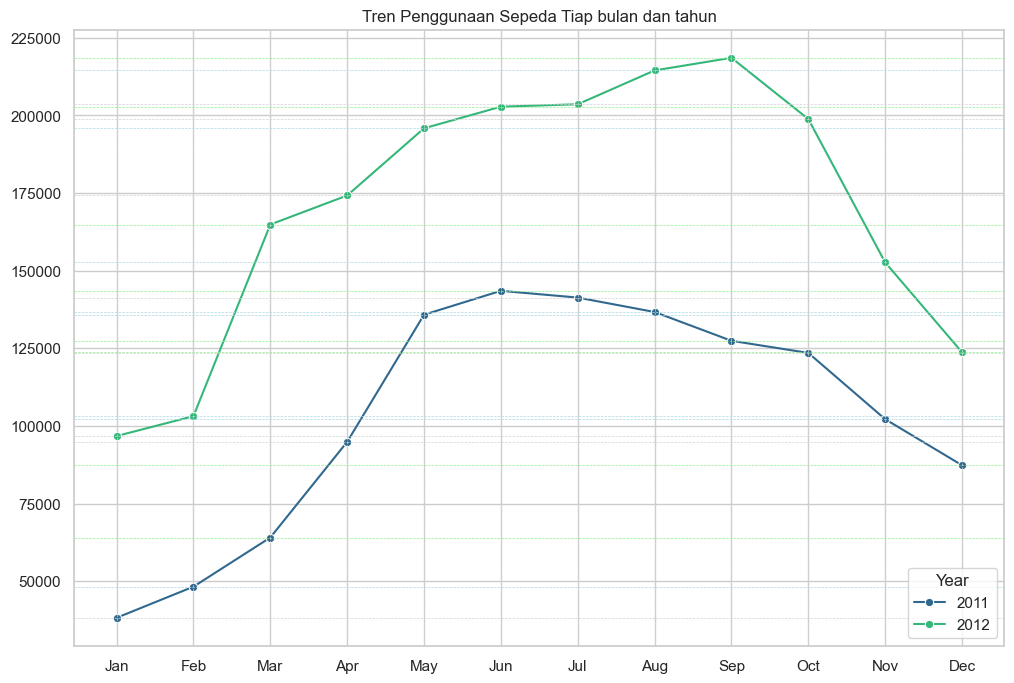

In [99]:
#3. Bagaimana tren penggunaan sepeda per bulan di tiap tahunnya?

agg_year_month_df = day_df.groupby(by=['yr', 'mnth']).agg({
	'cnt': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=agg_year_month_df, x='mnth', y='cnt', hue='yr', marker='o', errorbar=None, palette='viridis')

plt.title('Tren Penggunaan Sepeda Tiap bulan dan tahun')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2011', '2012'])

# add horizontal line for each point
line_colors = ['lightgrey', 'lightblue', 'lightgreen']
for index, row in agg_year_month_df.iterrows():
	color = line_colors[index % len(line_colors)]
	plt.axhline(y=row['cnt'], color=color, linestyle='--', linewidth=0.5)
 
# add vertical line for each month
for month in range(1, 13):
	plt.axvline(x=month, color='lightgrey', linestyle='--', linewidth=0.5)

plt.show()

## Pertanyaan 4

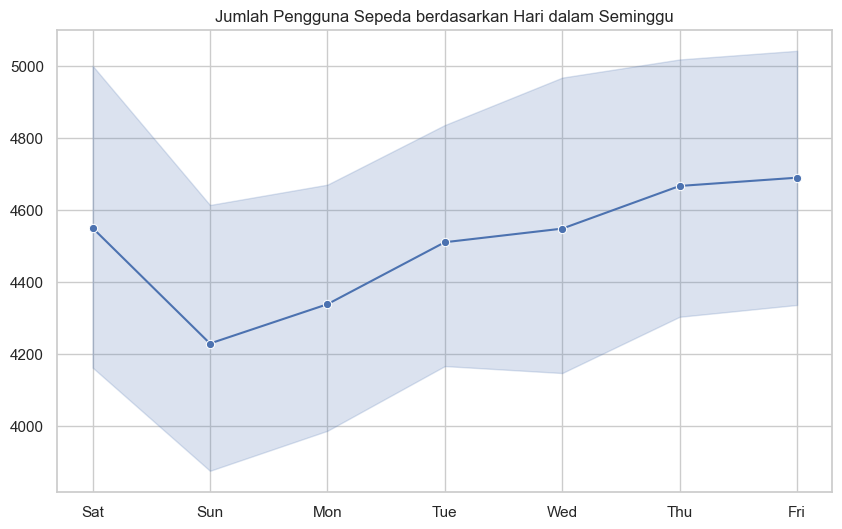

In [103]:
#4. Bagaimana pola penggunaan sepeda setiap hari?

fig, ax = plt.subplots(figsize=(10, 6))

# Menggunakan lineplot alih-alih barplot
sns.lineplot(
    x='weekday',
    y='cnt',
    data=day_df,
    ax=ax,  # Menggunakan ax tanpa indeks
    marker='o'  # Opsional: menambahkan penanda pada setiap titik data
)

# Memberikan judul dan label sumbu
ax.set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
ax.set_xlabel(None)
ax.set_ylabel(None)

plt.show()

In [114]:
#Menyimpan semua data yang sudah dibersihkan

day_df.to_csv("all_data.csv", index=False)

# CONCLUSION

## Conclusion Pertanyaan 1 

1. Bagaimana pengaruh cuaca dalam penggunaan Sepeda?
Berdasarkan visulization menggunakan bar chart, terlihat bahwa
cuaca benar-benar berpengaruh dalam penggunaan sepeda. Ketika cuaca cerah,
tingkat penggunaan sepeda meningkat, ketika cuaca berawan ada sedikit penurunan pengguna, 
tetapi ketika ada salju maupun hujan, tingkat penggunaan sepeda benar-benar turun drastis dibanding
banyaknya pengguna pada cuaca berawan maupun cerah

## Conclusion Pertanyaan 2
2. Bagaimana tingkat penggunaan sepeda pada holiday dan working day
Berdasarkan bar chart diatas, terlihat bahwa penggunaan sepeda disaat hari kerja lebih banyak jika dibandingkan dengan hari libur.
Hal ini sangat jelas tampak pada bar chart melihat bar chart hari kerja lebih tinggi dibanding dengan hari libur


## Conclusion Pertanyaan 3

3. Bagaimana trend penggunaan sepeda setiap bulan di tiap tahun?

Supaya terlihat bagaimana trend nya digunakan line chart, terlihat bahwa pada tahun 2011, pengguna sepeda mengalami peningkatan
pada bulan januari hingga juni di tahun 2011 dan mulai mengalami penurunan yang tidak terlalu signifikan pada bulan berikutnya
pada tahun 2012, penggunaan sepeda meningkat drastis dibanding tahun 2011, tetapi pola nya tetap sama yaitu ada peningkatan di bulan 
januari hingga september dan habis itu turun lagi dengan tidak signifikan

## Conclusion Pertanyaan 4

4. Bagaimana pola penggunaan sepeda setiap hari

Pada line chart terlihat bahwa pengguna sepeda meningkat dari hari senin hingga puncak terbanyaknya yaitu di hari Jumat dan kembali turun
di hari sabtu dan minggu. Hal ini relevan dengan perbandingan pengguna di hari kerja dan hari libur dimana pengguna sepeda cenderung meningkat
pada saat hari kerja daripada pada hari libur. 